<a href="https://colab.research.google.com/github/bhavyajethi/Deep-Learning-practice/blob/main/Scaled_Dot_Product_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# define word embeddings
embeddings = {
    'the':np.array([0.1,0.2,0.3]),
    'cat':np.array([0.4,0.5,0.6]),
    'sat':np.array([0.7,0.8,0.9]),
    'on':np.array([1.1,1.2,1.3]),
    'mat':np.array([1.4,1.5,1.6])
}

In [7]:
# define the input sentence
sentence = ['the', 'cat', 'sat', 'on', 'the', 'mat']

In [8]:
# convert sentence into embeddings
embedded_tokens = np.array(embeddings[word] for word in sentence)

In [12]:
# self attention function
def self_attention(q, k, v, mask=None):
  # Calculate the dot product of Q and K transpose.
  matmul_qk = tf.matmul(q, k, transpose_b=True)
  # Get the dimension of the key vectors.
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  # Scale the dot products by the square root of the key dimension.
  scaled_attention_logits = matmul_qk/tf.math.sqrt(dk)

  # If a mask is provided, apply it to the scaled attention logits.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9) # Add a large negative number to masked positions.

  # Apply softmax to get the attention weights.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
  # Multiply the attention weights by V to get the output.
  output = tf.matmul(attention_weights, v) # Corrected line
  # Return the output and attention weights.
  return output, attention_weights

In [11]:
# Q = K = V for self-attention
Q = K = V = tf.constant(list(embeddings[word] for word in sentence), dtype=tf.float32)

In [14]:
# Apply self attention
output, attention_weights = self_attention(Q, K, V)

Attention Weights:
[[0.13654941 0.15150364 0.16809557 0.19307847 0.13654941 0.21422349]
 [0.09580115 0.1242235  0.1610782  0.22776176 0.09580115 0.29533425]
 [0.06302381 0.09550752 0.14473392 0.25193048 0.06302381 0.3817804 ]
 [0.03306075 0.0616754  0.11505651 0.26422685 0.03306075 0.4929197 ]
 [0.13654941 0.15150364 0.16809557 0.19307847 0.13654941 0.21422349]
 [0.01935403 0.04219592 0.09199614 0.26007685 0.01935403 0.56702304]]
Output:
[[0.71787745 0.8178775  0.91787744]
 [0.84561026 0.9456103  1.0456103 ]
 [0.96373755 1.0637376  1.1637375 ]
 [1.0925591  1.192559   1.292559  ]
 [0.71787745 0.8178775  0.91787744]
 [1.1650631  1.2650633  1.3650633 ]]


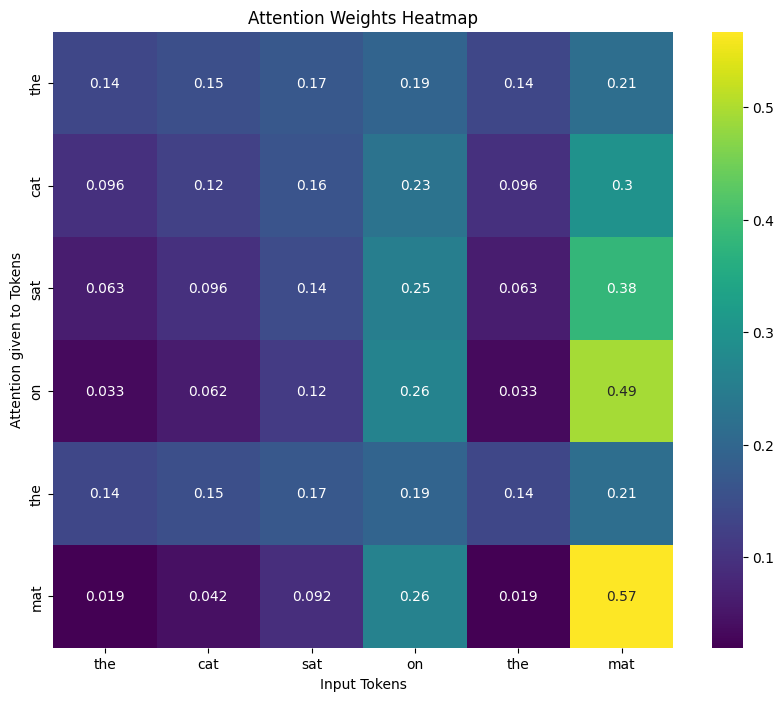

In [15]:
# Print attention weights
print("Attention Weights:")
print(attention_weights.numpy())

# Print output
print("Output:")
print(output.numpy())

# Visualize attention weights
tokens = sentence
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights.numpy(), xticklabels=tokens, yticklabels=tokens, cmap='viridis', annot=True)
plt.xlabel('Input Tokens')
plt.ylabel('Attention given to Tokens')
plt.title('Attention Weights Heatmap')
plt.show()

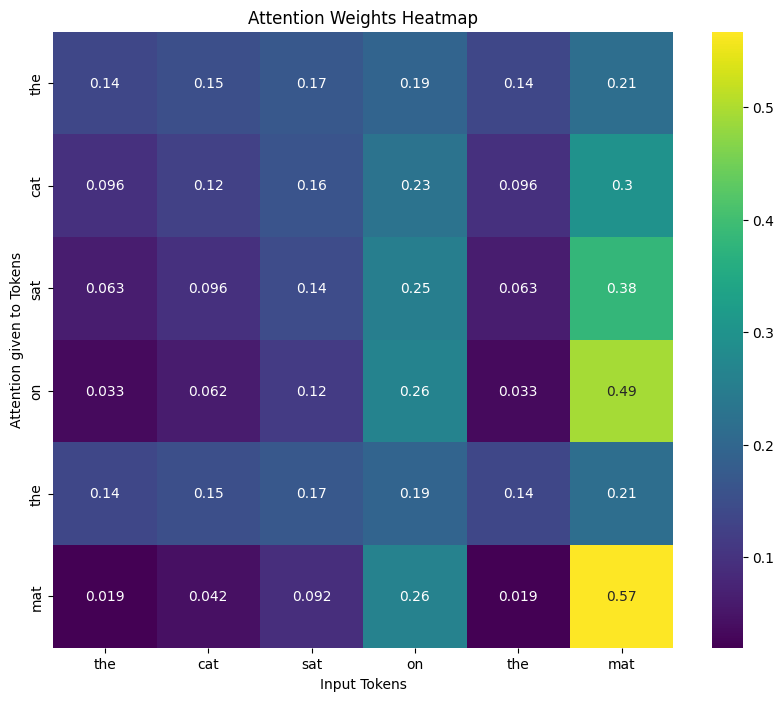

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

tokens = ['the', 'cat', 'sat', 'on', 'the', 'mat']
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap='viridis', annot=True)
plt.xlabel('Input Tokens')
plt.ylabel('Attention given to Tokens')
plt.title('Attention Weights Heatmap')
plt.show()